# Counting inversions

The problem of counting inversions is discussed in the book  [Algorithms Illuminated](http://algorithmsilluminated.org) in Section 3.2 in Part 1. 

Here we will follow the book but we will also provide you with Python programs and test cases, both to convince you that the algorithm works and to observe the asymptotic running time. 

Counting inversions is a way of solving the problem of comparing rankings. And comparing rankings can be used for systems that make recomendations: what someone buys can be recommended to others that have *similar rankings*. The underlying assumption is that people that have similar rankings might have a similar taste. 

So, how could we compare rankings? Say that we have a collection of $N$ items (books, authors, songs, ...) that are ranked by person P and by person Q. Say that the items are $i_1, i_2, \ldots, i_n$. We associate to each item the order that P gives them. And we form an array where the indices are P's ranking and the elements are Q's ranking. 

Here is an example. The items to be ranked are the authors Paul Auster, Colm Tóibín, Leopoldo Marechal, Marguerite Yourcenar, Samanta Schweblin and Javier Marías. Say that P ranks them as 

* 0 Leopoldo Marechal

* 1 Colm Tóibín

* 2 Marguerite Yourcenar

* 3 Paul Auster

* 4 Samanta Schweblin

* 5 Javier Marías

Using the numbers to the left, Q's ranking is 3), 1), 2), 5), 4), 0).

P likes best Leopoldo Marechal while Q likes best Paul Auster.

We can put together these two using an array where the indices are P's ranking

```Python
A = [3, 1, 2, 5, 4, 0]
```

Notice that if both P and Q ranked the items in the same order the array would be 

```Python
B = [0, 1, 2, 3, 4, 5]
```

One way of measuring *the difference* between two rankings is counting the number of items that appear before in P and later in Q.

Given an array ```a``` we want to count the situations where 

```Python
i < j and a[i] > a[j]
```

We call these *inversions*. For example, in ```B``` there are 0 inversions. And in ```A``` we have 

* 3 before 1, 2 and 0: that is already three inversions. 

* 1 is before 0: one more!

* 2 is before 0: one more!

* 5 is before 4 and 0: that is two more inversions. 

* 4 is  before 0: that is one more inversion.

There are 8 inversions in A. 

How many inversions could there possibly be? Well, I hope you *see* that in a sorted array (B) there are no inversions. What about an array that is sorted in reverse ordering? For example 

```Python
C = [5,4,3,2,1,0]
```

* 5 is before five elements that are smaller

* 4 is before four smaller elemets

* 3 is before three smaller elements

* 2 is before two smaller elements

* 1 is before one smaller elements

For C there are $1 + 2 + 3 + 4 + 5 = 15$ inversions. 

If $n$ is the length of an array $a$, there are at most 

$$\sum_{i = 1}^{n - 1} i = \frac{(n-1)n}2$$

This is a quadratic function. 

Here is a function that counts inversions looking for them as we did upto now (called *brute force* search):

In [1]:
def bf_count_inversions(a):
    n = len(a)
    
    count_inv = 0
    for i in range(n):
        for j in range(i+1, n):
            if a[i] > a[j]: count_inv += 1
    return count_inv

In [2]:
A = [3,1,2,5,4,0]
B = [0,1,2,3,4,5]
C = [5,4,3,2,1,0]
print(bf_count_inversions(A))
print(bf_count_inversions(B))
print(bf_count_inversions(C))

8
0
15


We will use this as our reference implementation: we are convinced that it counts what we want so we can compare other implementations, maybe more difficult to understand, with it. 

But, we would not want to use this implementation in a program! I hope you see that the function is quadratic, thus not feasible for big arrays (as you can imagine, real systems doing recommendations use huge data sources).

So, following the book's motto: *Can we do better?* we try Divide & Conquer. 

The book uses Divide & Conquer to come up with an algorithm:

```

1) Divide the array in two halves.

2) Recursively count inversions in both halves.

3) How can we use the two counts to calculate the total number of inversions?

```

The example

```Python
[1,3,5,2,4,6]
```

makes it clear that we cannot just add the two counts. In the example, the number of inversions in the first half is 0 and the number of inversions in the second half is 0. However the total number of inversions is 3: 

* 3 appears before 2
* 5 appears before 2 and 4

This means that there are inversions across the split between the two halves. So we need to count these too in order to solve the problem for the whole array. And we want to do this in at most linear time!

**If** the two halves were sorted we could imagine using the same idea as merge, but, when we find that we pick the next element from the right half, we have identified an inversion. And moreover: there will be inversions with the rest of the elements in the left half given that they are sorted. 

So the key to the solution is to count inversions and leave the halves sorted!

What follows is a Python implementation of the algorithm in the book doing sorting in place. Observe that the functions return a value: a number, the inversion count.  

* Make sure you spot the differences with mergesort! * 


In [3]:
def count_inversions(a):
    n = len(a)
    aux = [None] * n
    return _count_and_sort(a, 0, n, aux)
    
def _count_and_sort(a, lo, hi, aux):
    n = hi - lo
    if n <= 1: # base case: nothing left to do
        return 0
    # To the meat of the algorithm. Notice the two recursive calls.
    mid = (lo + hi) // 2                            # Step 1) in D&C
    c_left  = _count_and_sort(a, lo, mid, aux)      # Step 2) in D&C
    c_right = _count_and_sort(a, mid, hi, aux)      # Step 2) in D&C
    c_split = _merge_and_count(a, lo, mid, hi, aux) # Step 3) in D&C 
    
    return c_left + c_right + c_split

def _merge_and_count(a, lo, mid, hi, aux):
    n = hi - lo
    i = lo
    j = mid
    
    count = 0
    
    # use aux[0:n] to merge the two parts a[lo:mid] and a[mid:hi]
    for k in range(n):
        if i == mid:
            aux[k] = a[j]
            j += 1
        elif j == hi:
            aux[k] = a[i]
            i += 1
        elif a[j] < a[i]:
            aux[k] = a[j]
            j += 1
            count = count + mid - i # we add all the inversions for a[j] at once!
        else:
            aux[k] = a[i]
            i += 1
    # update a with the merged parts
    a[lo:hi] = aux[0:n]
    return count

In [4]:
A = [3,1,2,5,4,0]
B = [0,1,2,3,4,5]
C = [5,4,3,2,1,0]
print(count_inversions(A))
print(count_inversions(B))
print(count_inversions(C))

8
0
15


We would like to test the function more extensively. For this we use the same methods we already know. In this case we will compare with the brute force function (because we do not have a reference function built in Python!).

In [5]:
import random
import time
import matplotlib.pyplot as plt
import math

In [6]:
def random_number_list(lower,upper,short,long):
    length = random.randrange(short,long)
    return [random.randrange(lower,upper) for i in range(length)]

def test_program_once(a):
    c1 = bf_count_inversions(a) 
    c2 = count_inversions(a)
    if c1 != c2: print('expected', c1, 'but found', c2)
    return c1 == c2

def test_program(times):
    for i in range(times):
        if not test_program_once(random_number_list(-10,10,0,1000)):
            return False
    return True
    

In [7]:
test_program(100)

True

In [8]:
# generate running time data
def running_time_data(start_size, p, step, times):
    n = start_size
    results = ([0] * times, [0] * times)
    for i in range(times):
        a = list(range(n))
        random.shuffle(a)
        start = time.process_time_ns() 
        p(a)
        (results[0][i],results[1][i]) = (n, time.process_time_ns() - start)
        n *= step
    return results

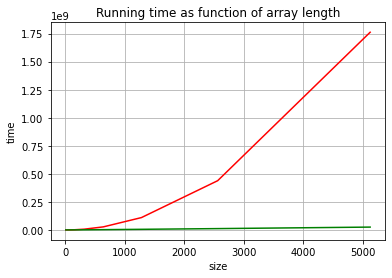

In [9]:
# the sizes and execution times for 10 random arrays of lengths 10, 20, 40, ..., 5120.
# Because we collect data for the brute force program we use small sizes of the arrays!

# Brute force data:
(size_bf,t_bf) = running_time_data(10,bf_count_inversions,2,10)

# Divide & Conquer data:
(size,t)       = running_time_data(10,count_inversions,2,10)


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for time as function of size:
# red for the brute force values
# green for the divide and conquer values
ax.plot(size_bf, t_bf, color = 'red')
ax.plot(size,    t,    color = 'green')

# Decorate the graph:
ax.set(xlabel='size', ylabel='time',
       title='Running time as function of array length')

# Add a grid:
ax.grid()

# Display:
plt.show()

## Exercise

Modify the implementation of ```count_inversions``` so that the original array does not change. 

Make sure to test that the argument does not change and that the asymptotic running time does not change.